<a href="https://colab.research.google.com/github/haisukma/Attrition-Rate-Jaya-Maju/blob/main/Attrition_Rate_Jaya_Maju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import joblib

**Data Understanding**

In [ ]:
df = pd.read_csv('/content/employee_data.csv')

In [ ]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Menangani Missing Value

In [ ]:
# Melakukan cek terhadap kolom mana saja yang memiliki value null
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Membuat Dataframe untuk menampilkan kolom yang memliki nilai null
nan_info = pd.DataFrame({
    'Tipe Data': df[columns_with_nan].dtypes,
    'Jumlah Null': df[columns_with_nan].isnull().sum()
})

print("Kolom yang memiliki nilai Null beserta tipe datanya:")
print(nan_info)

Kolom yang memiliki nilai Null beserta tipe datanya:
          Tipe Data  Jumlah Null
Attrition   float64          412


In [ ]:
# Menghapus kolom yang memiliki nilai null
df = df.dropna()

**Univariate Analysis**

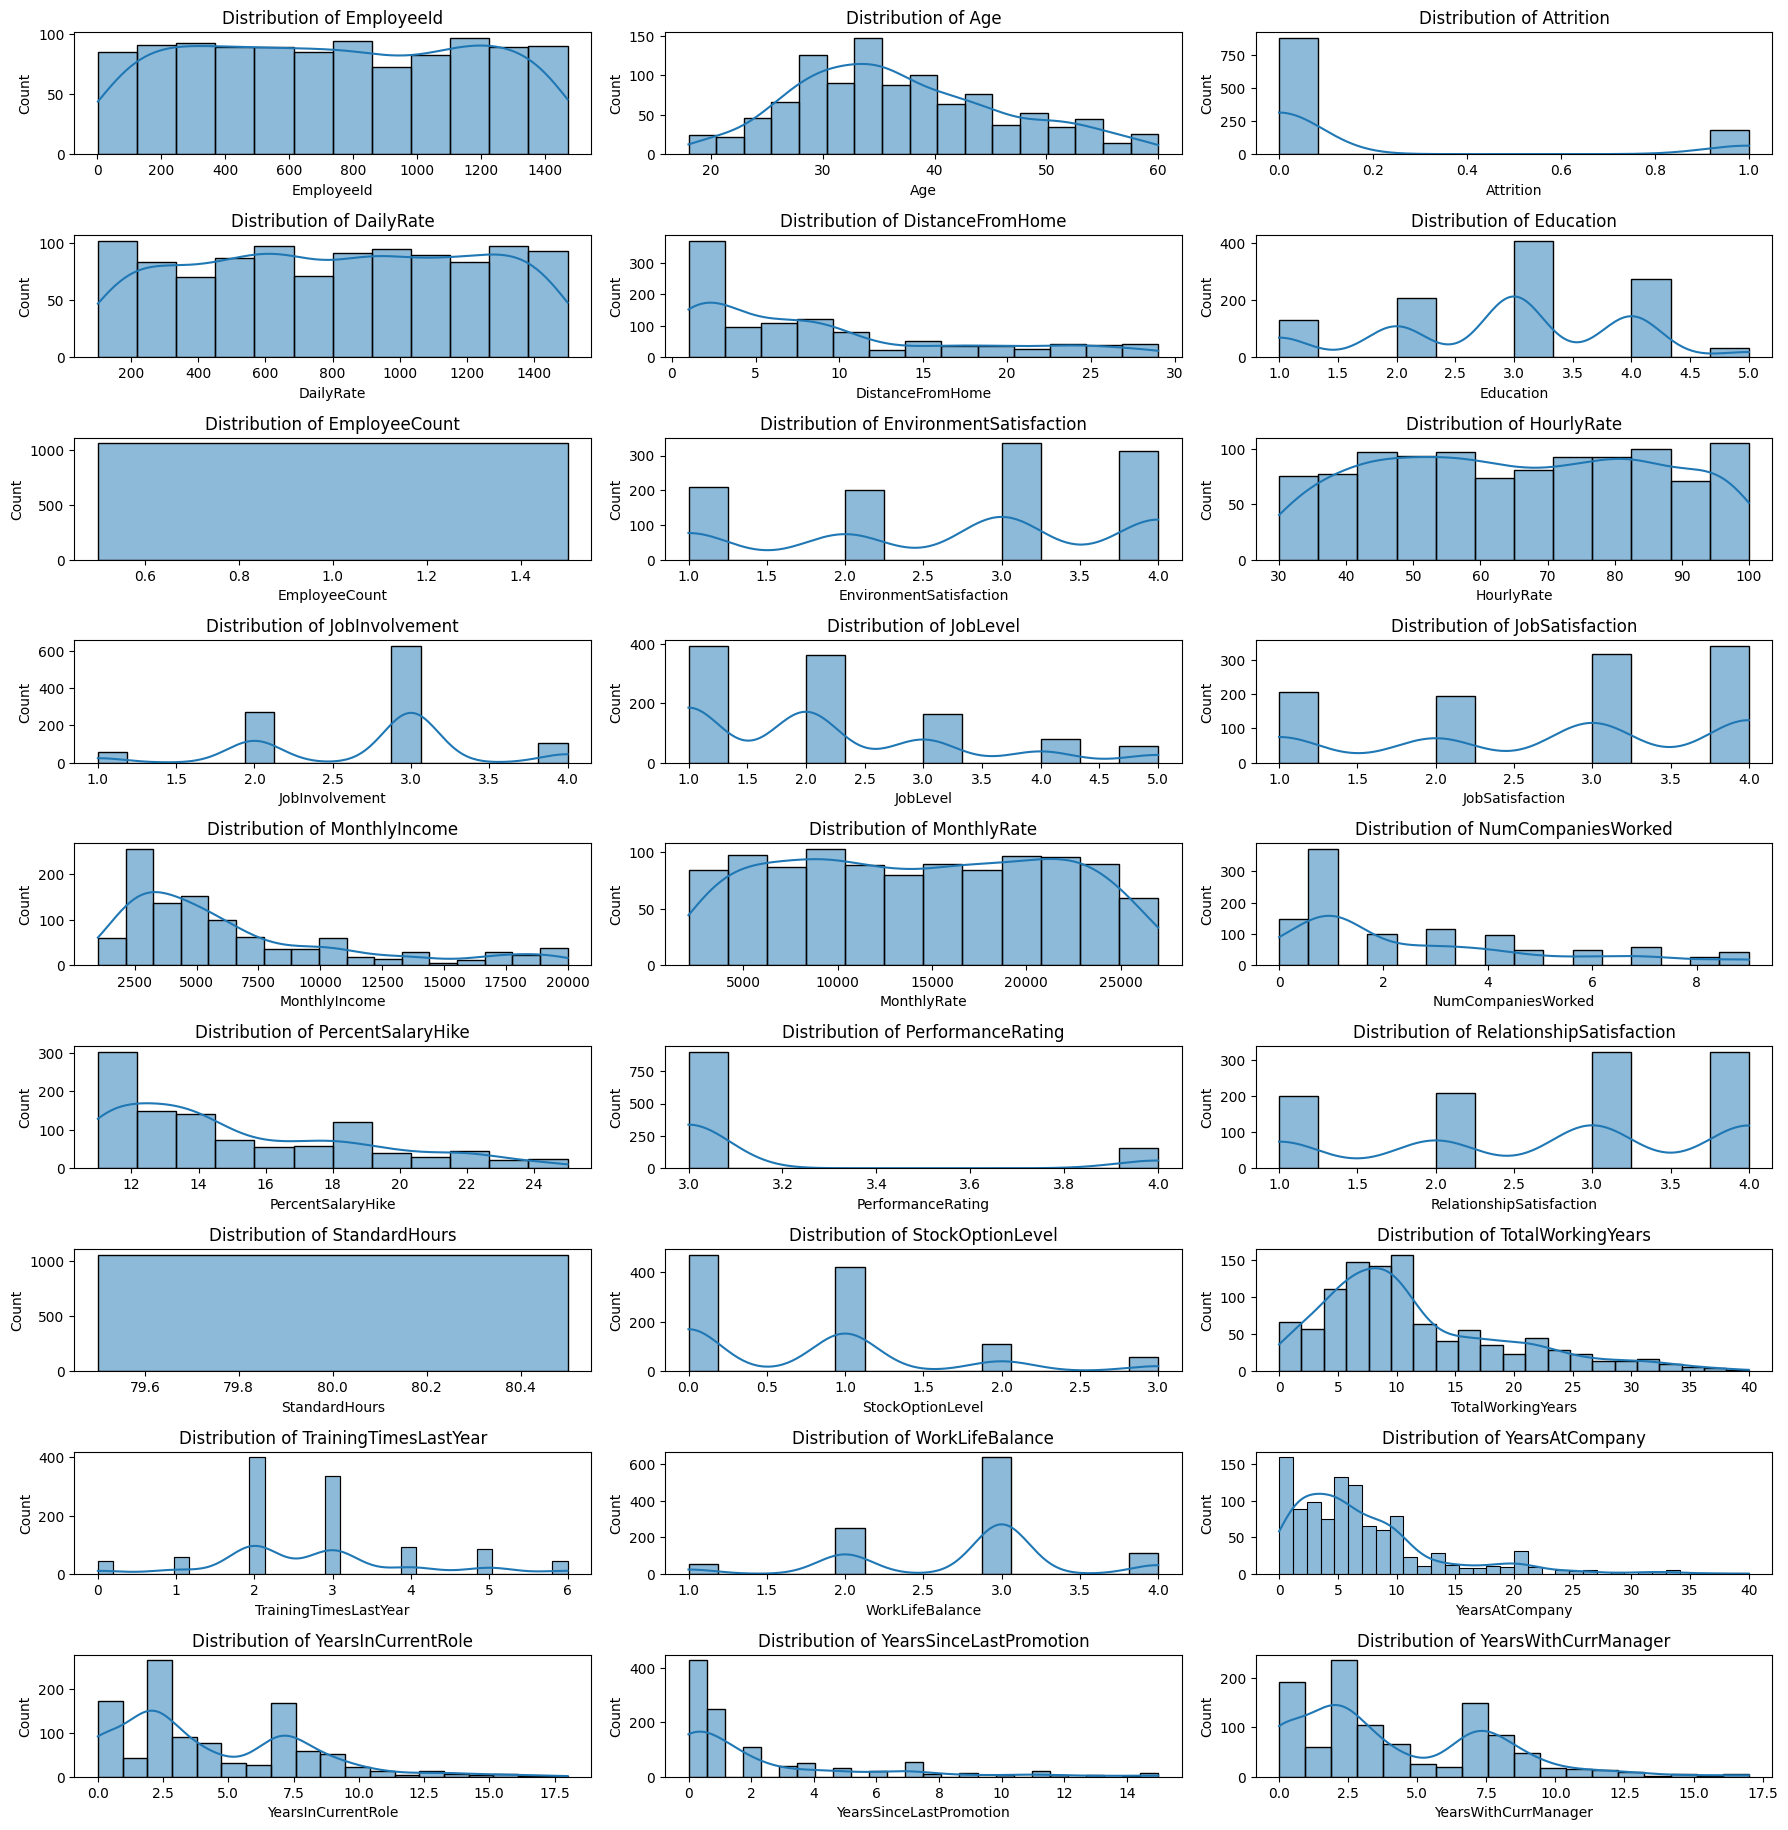

In [ ]:
# Identifikasi kolom numerical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Univariate analysis untuk numerical variables
plt.figure(figsize=(18, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

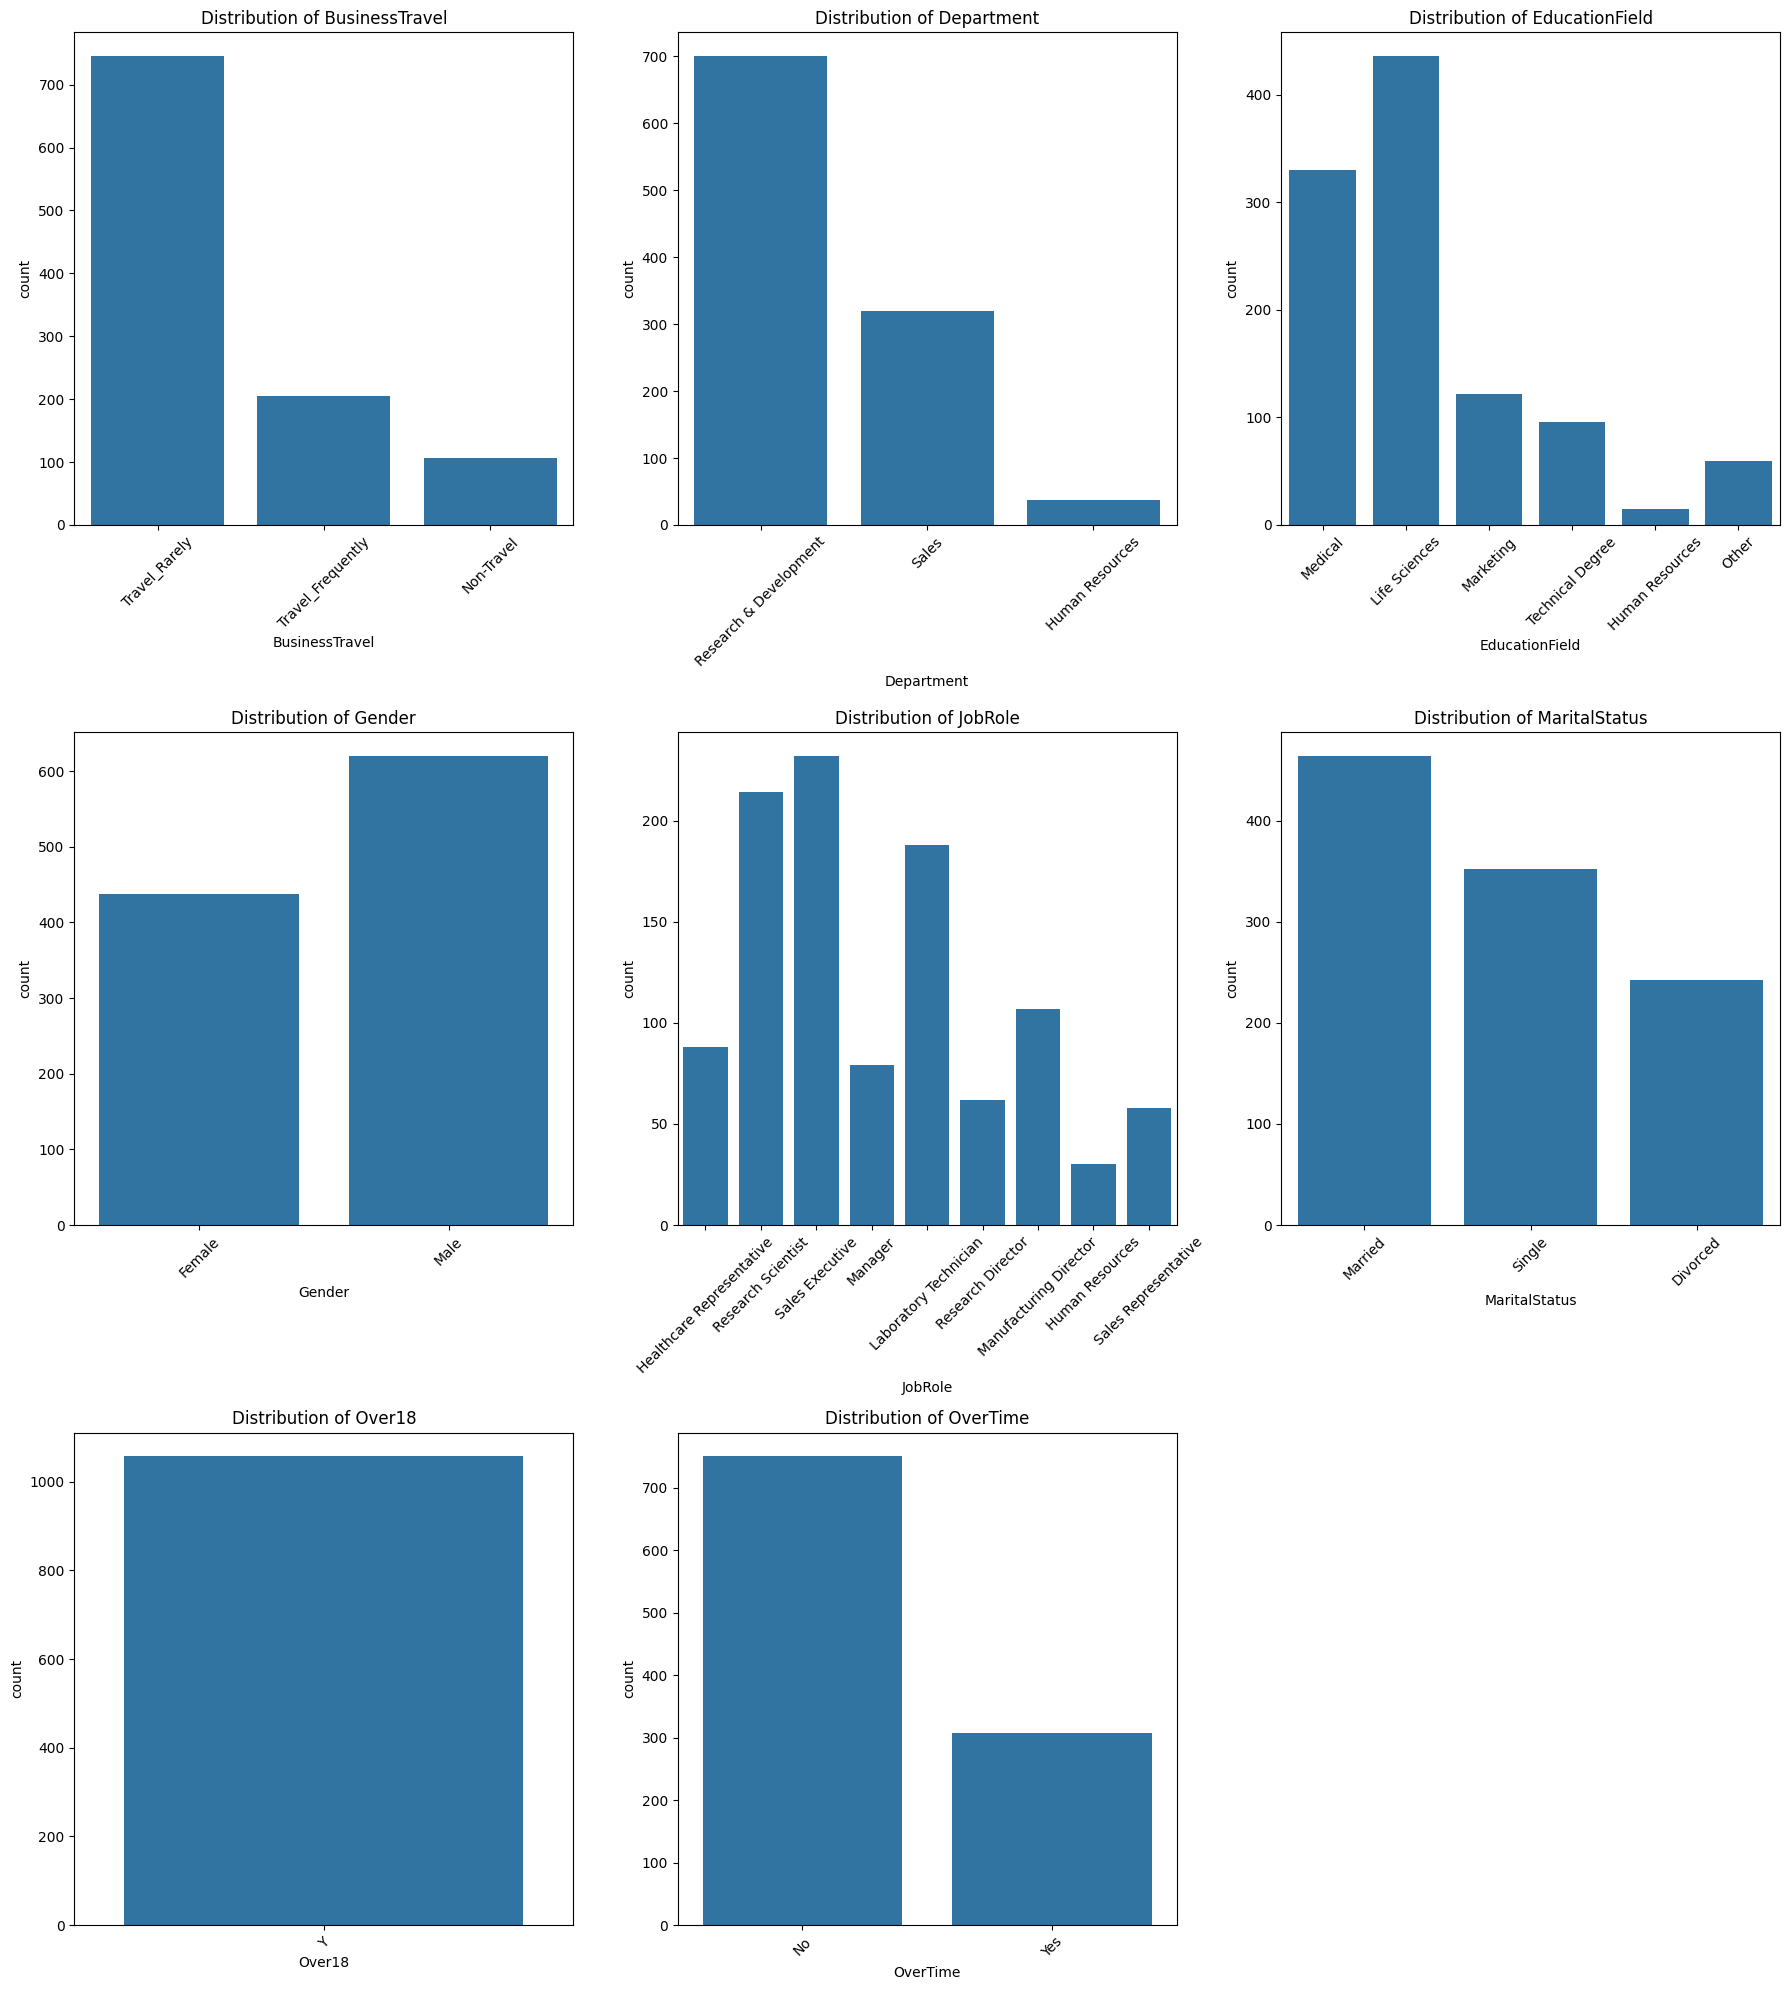

In [ ]:
# Identifikasi kolom categorical
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Univariate analysis untuk categorical variables
plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Menghapus kolom `EmployeeCount`, `StandardHours`, dan `Over18` karena hanya memiliki satu nilai
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

**Multivariate Analysis**

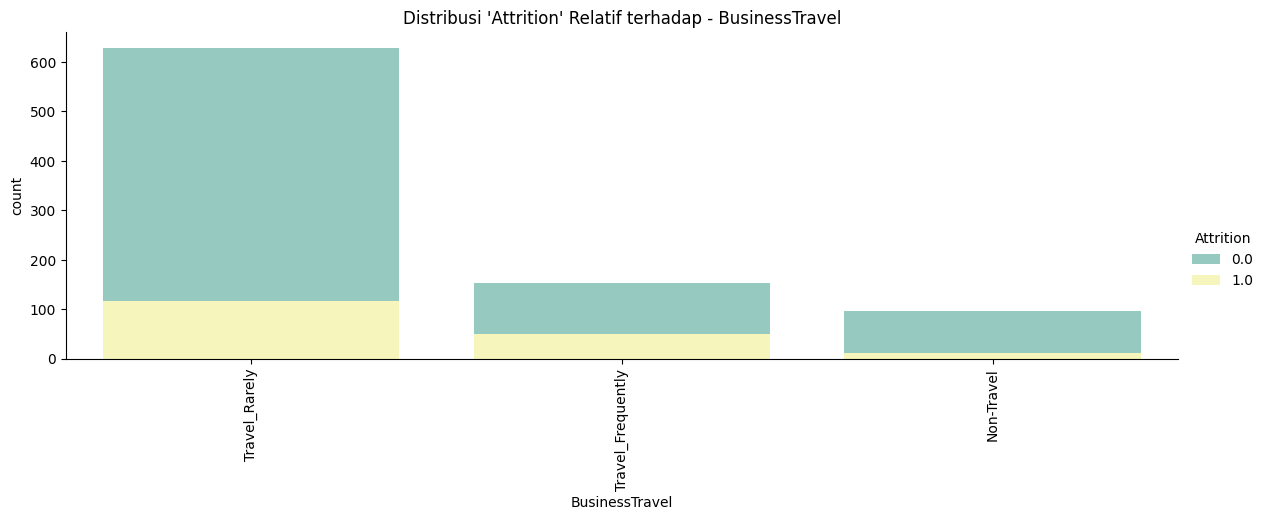

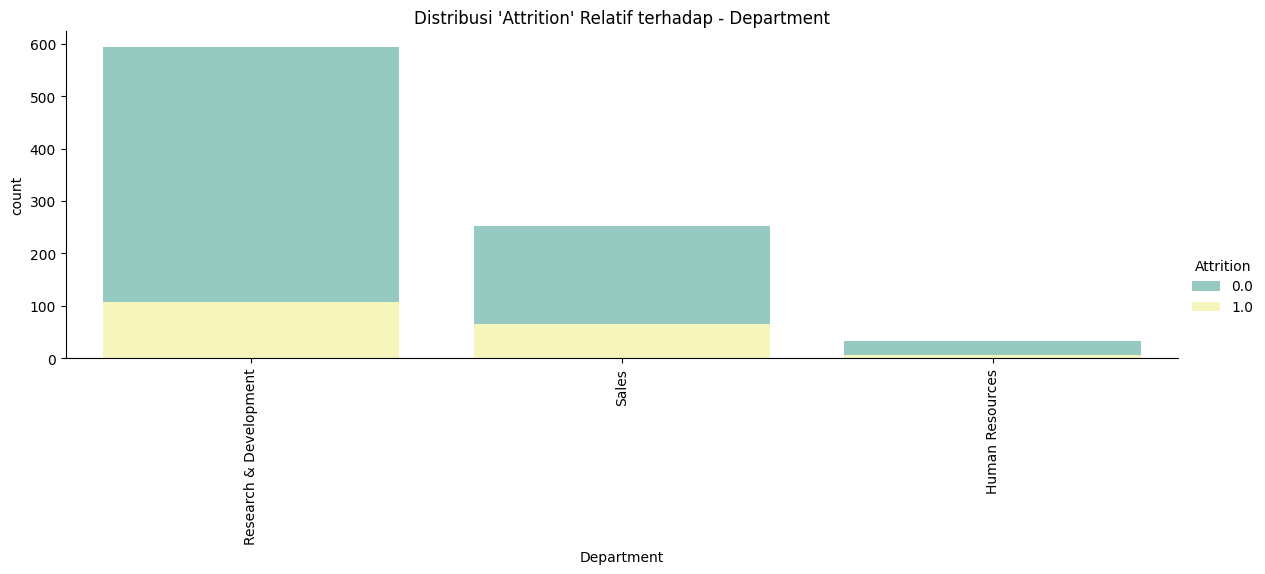

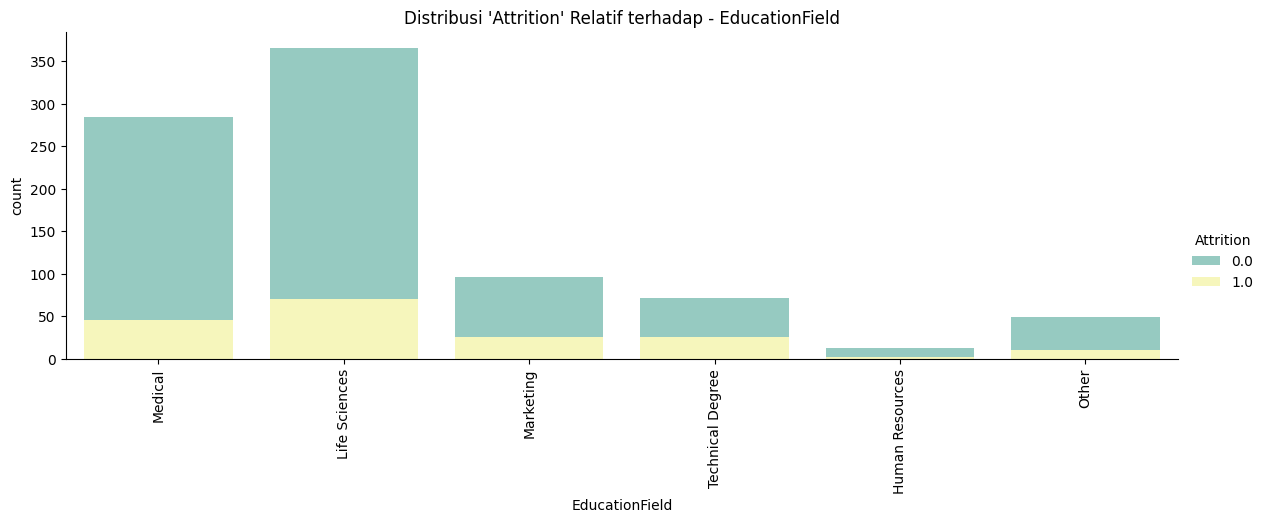

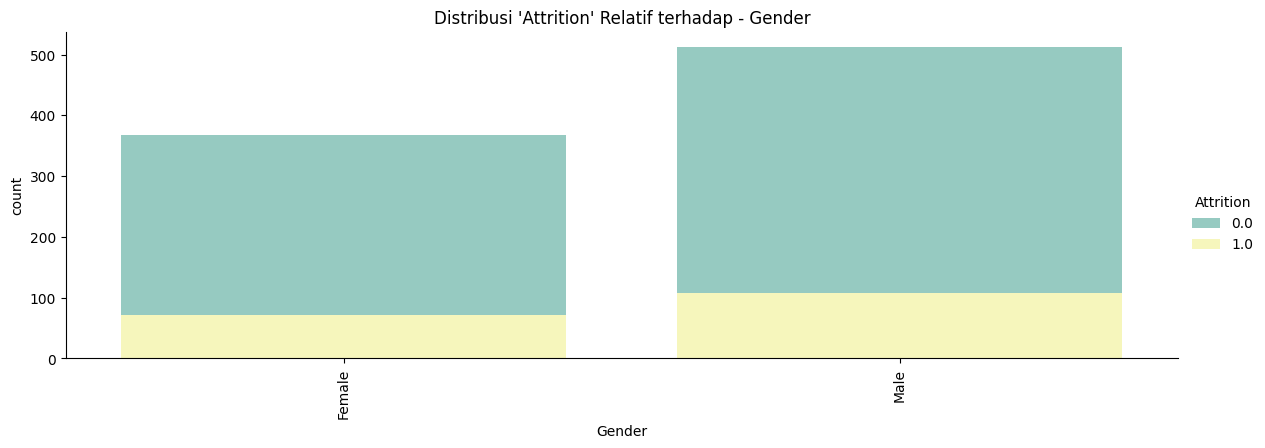

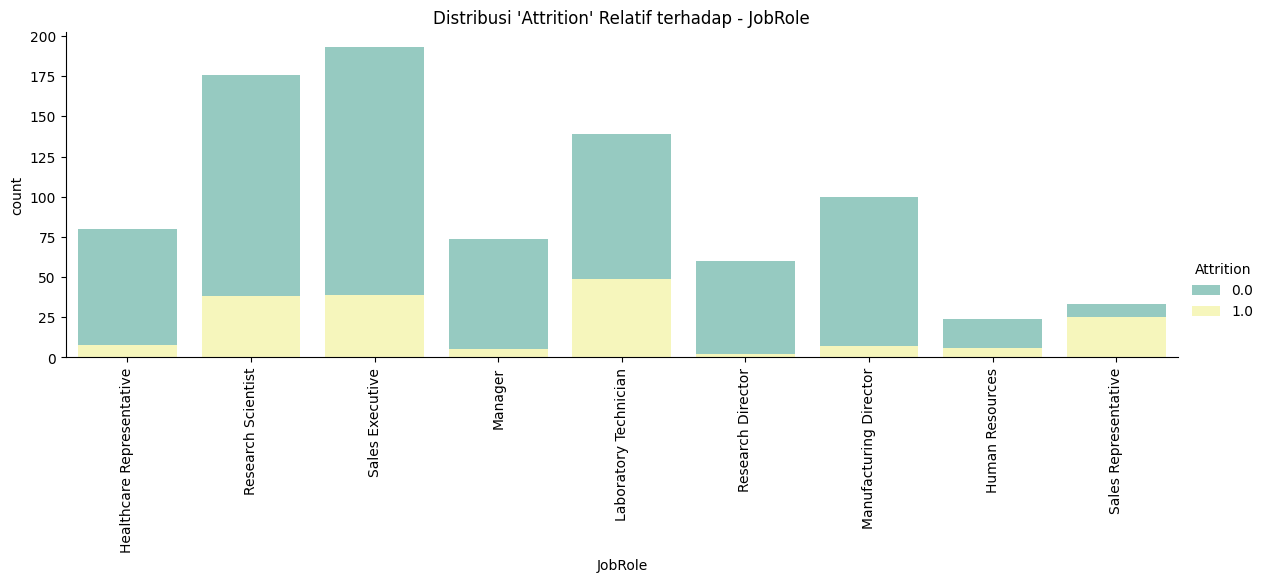

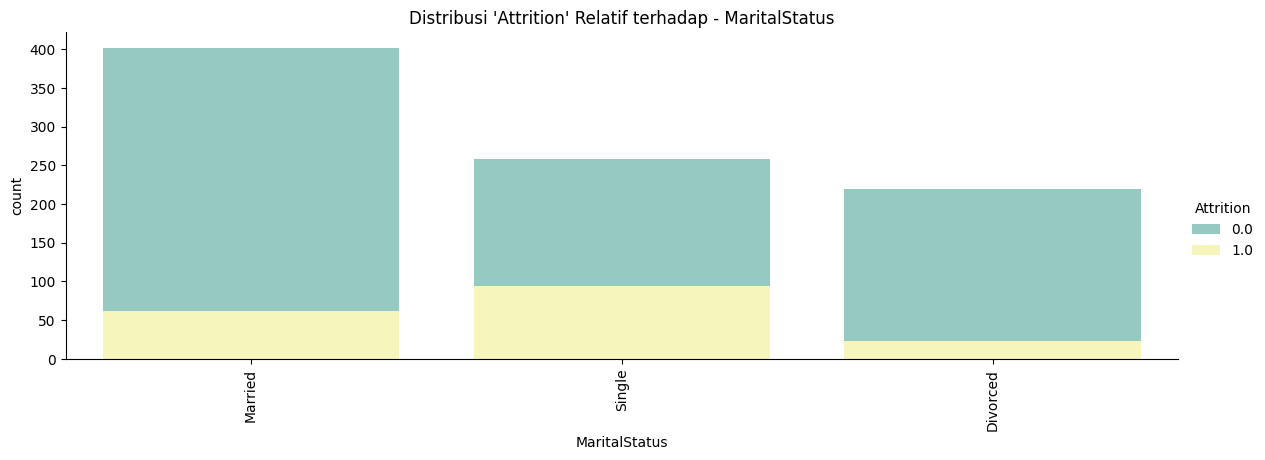

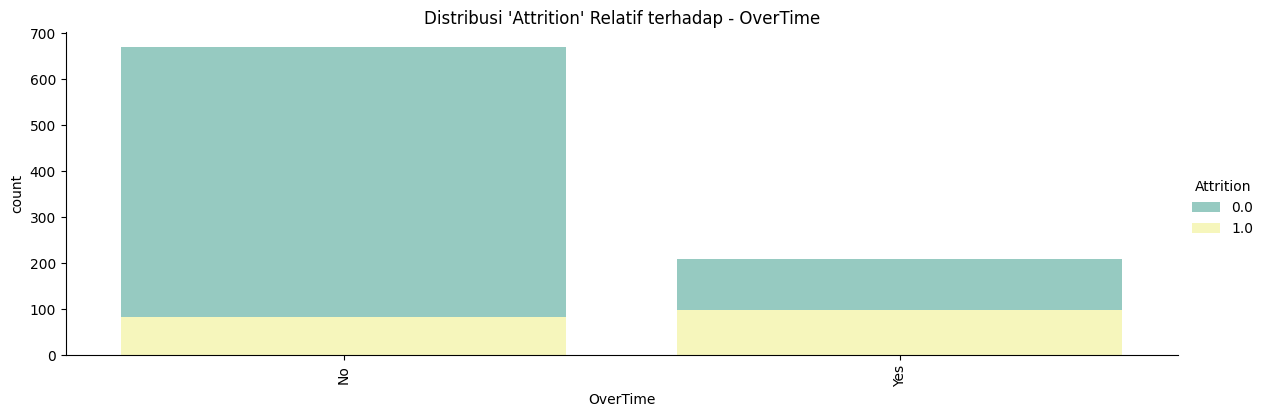

In [ ]:
# Identifikasi semua fitur kategorikal dalam dataset
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Membuat plot untuk setiap fitur kategorikal relatif terhadap 'Attrition'
for col in categorical_features:
    sns.catplot(x=col, hue="Attrition", kind="count", dodge=False, height=4, aspect=3, data=df, palette="Set3")
    plt.title("Distribusi 'Attrition' Relatif terhadap - {}".format(col))
    plt.xticks(rotation=90)
    plt.show()

**Correlation Matrix**

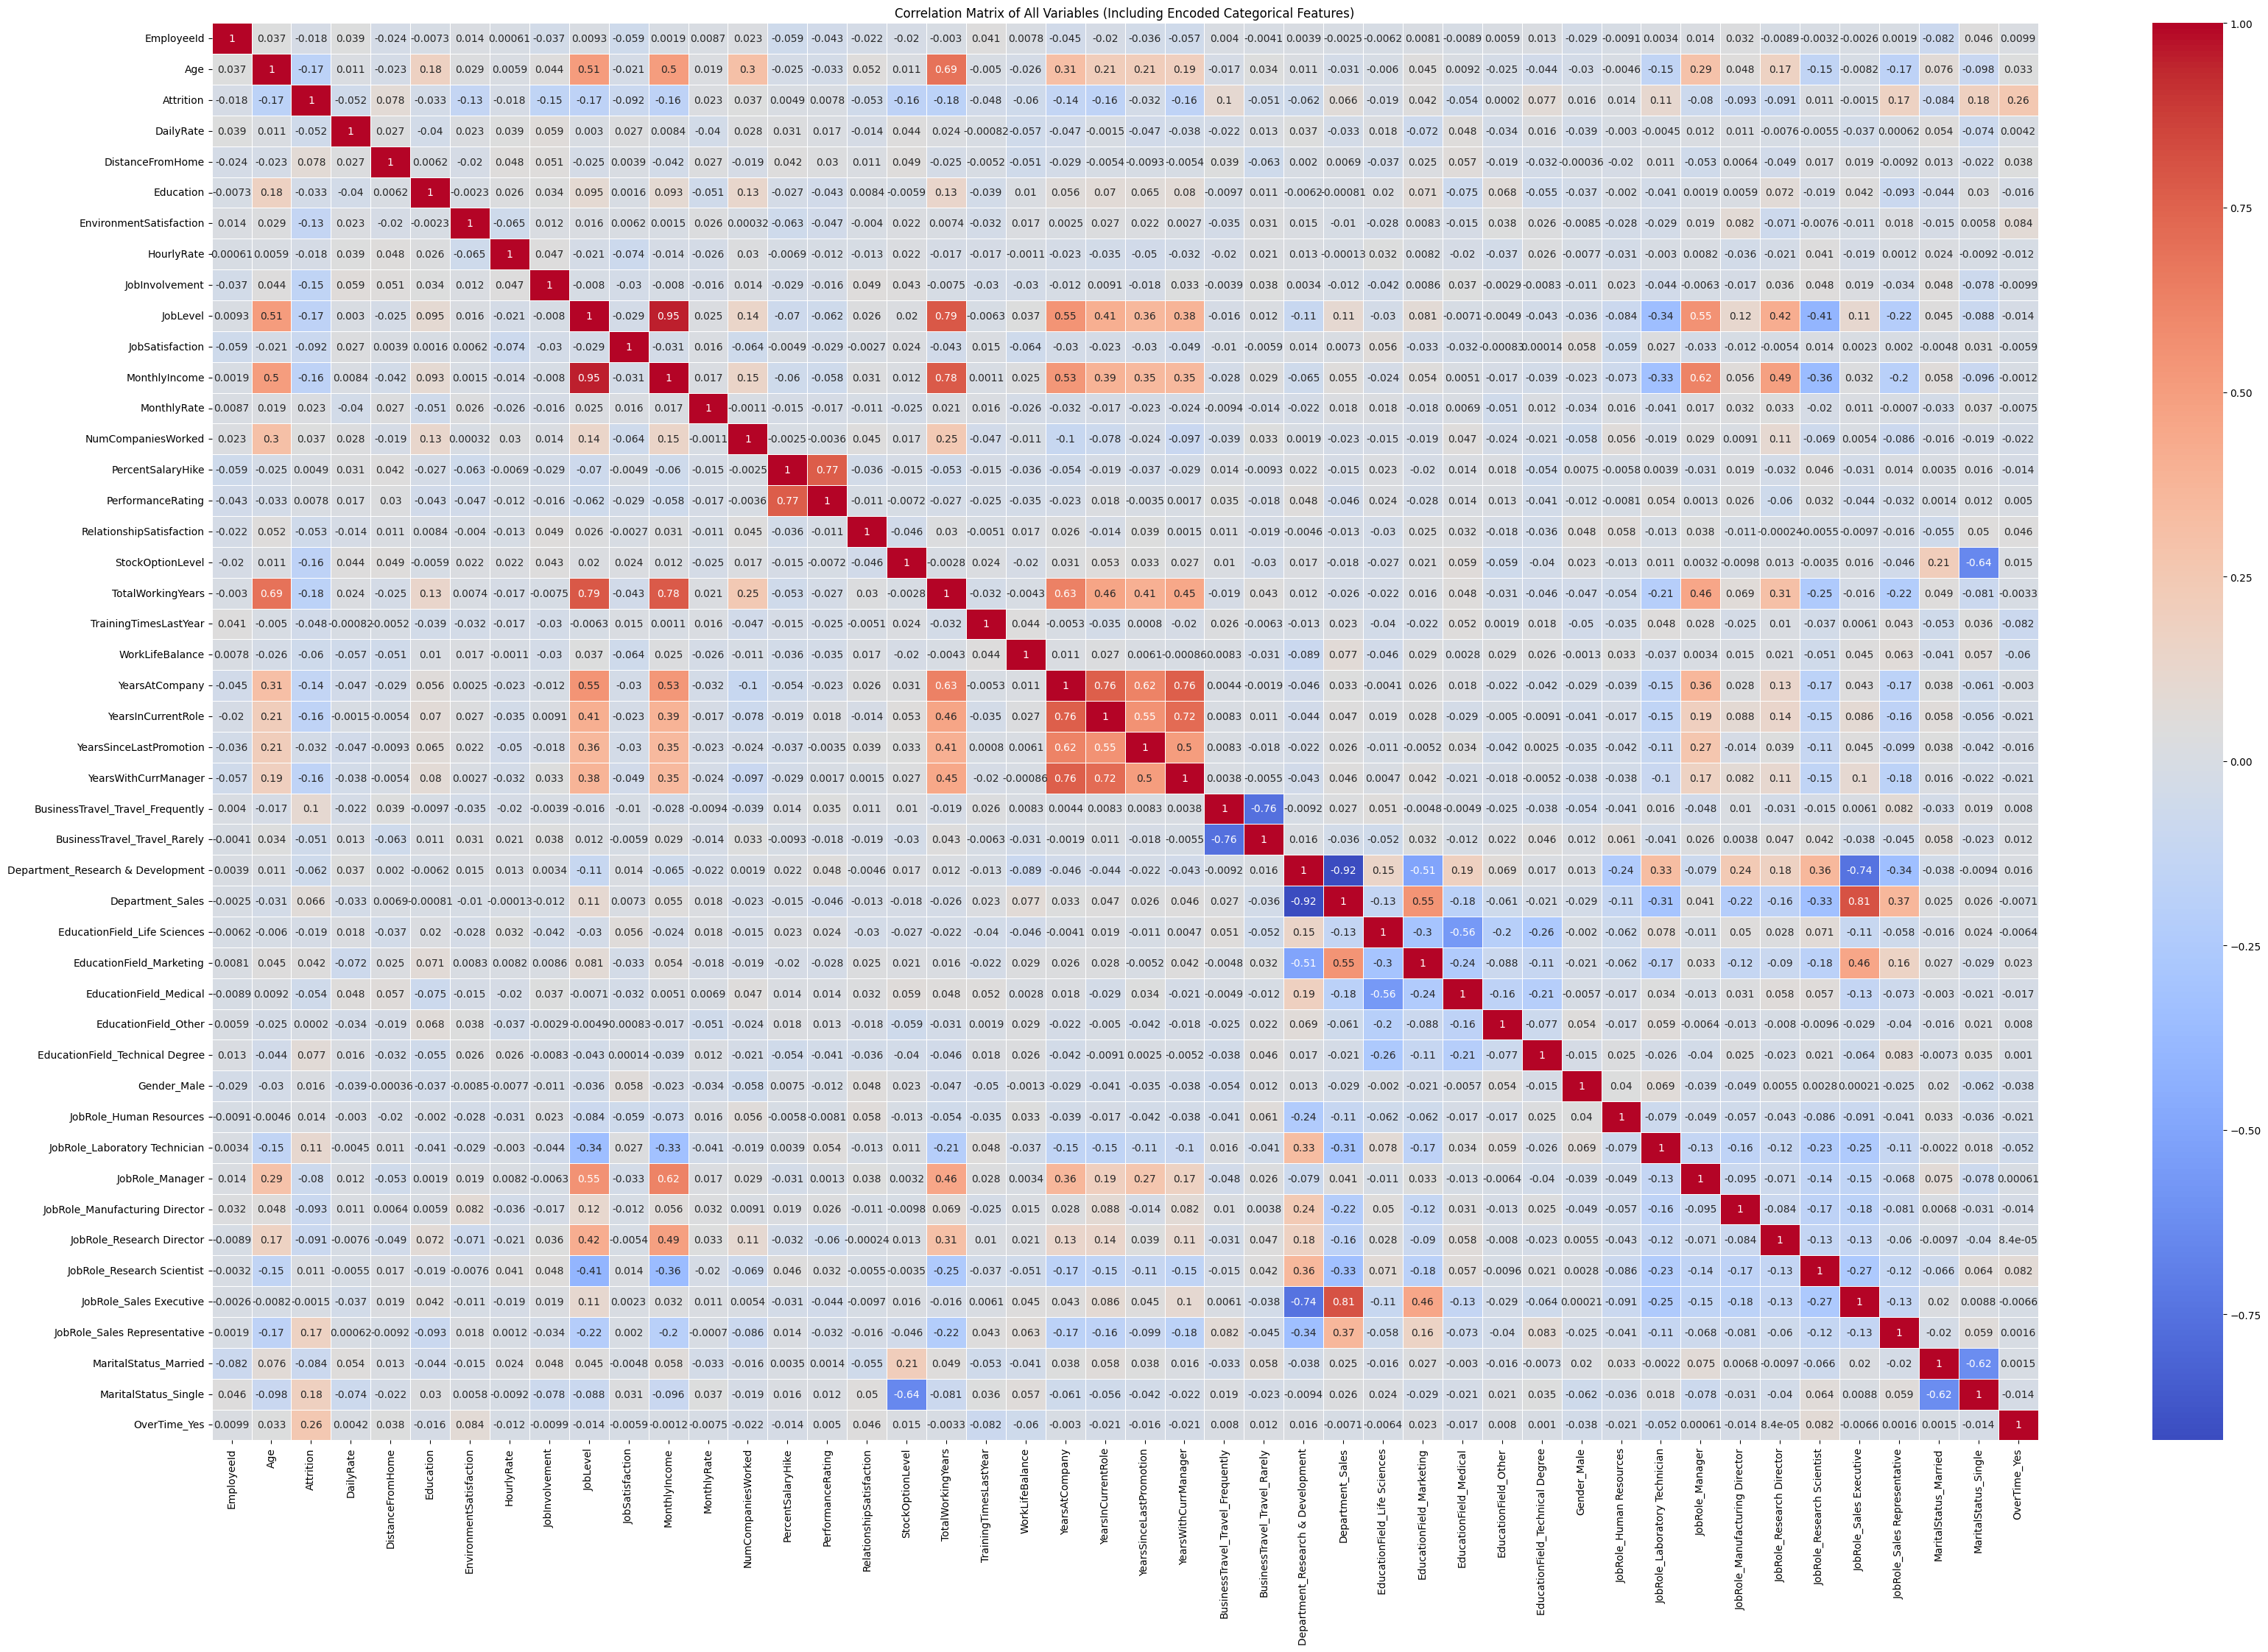

In [ ]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Plot matriks korelasi
plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Variables (Including Encoded Categorical Features)')
plt.show()

Factors  correlated with Attrition:
OverTime_Yes                         0.255856
MaritalStatus_Single                 0.184303
JobRole_Sales Representative         0.168200
JobRole_Laboratory Technician        0.113390
BusinessTravel_Travel_Frequently     0.104074
DistanceFromHome                     0.078074
EducationField_Technical Degree      0.076868
Department_Sales                     0.066083
EducationField_Marketing             0.042300
NumCompaniesWorked                   0.037429
MonthlyRate                          0.023299
Gender_Male                          0.015887
JobRole_Human Resources              0.014040
JobRole_Research Scientist           0.011259
PerformanceRating                    0.007755
PercentSalaryHike                    0.004907
EducationField_Other                 0.000197
JobRole_Sales Executive             -0.001532
HourlyRate                          -0.017524
EmployeeId                          -0.017912
EducationField_Life Sciences        -0.01928

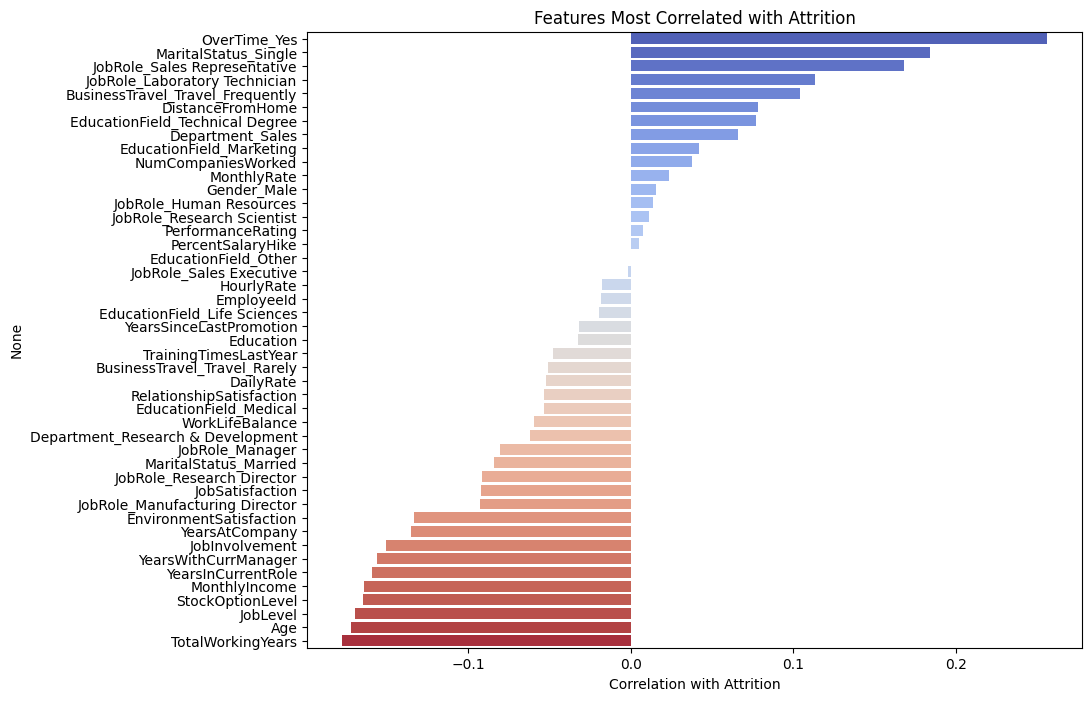

In [ ]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Ambil korelasi dengan kolom 'Attrition'
attrition_correlation = correlation_matrix["Attrition"].sort_values(ascending=False)

factors = attrition_correlation
factors = factors.drop('Attrition')

print("Factors  correlated with Attrition:")
print(factors)

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=factors.values, y=factors.index, hue=factors.index, dodge=False, palette="coolwarm", legend=False)
plt.title("Features Most Correlated with Attrition")
plt.xlabel("Correlation with Attrition")
plt.show()

Top 10 factors most correlated with Attrition:
OverTime_Yes                        0.255856
MaritalStatus_Single                0.184303
JobRole_Sales Representative        0.168200
JobRole_Laboratory Technician       0.113390
BusinessTravel_Travel_Frequently    0.104074
DistanceFromHome                    0.078074
EducationField_Technical Degree     0.076868
Department_Sales                    0.066083
EducationField_Marketing            0.042300
NumCompaniesWorked                  0.037429
Name: Attrition, dtype: float64


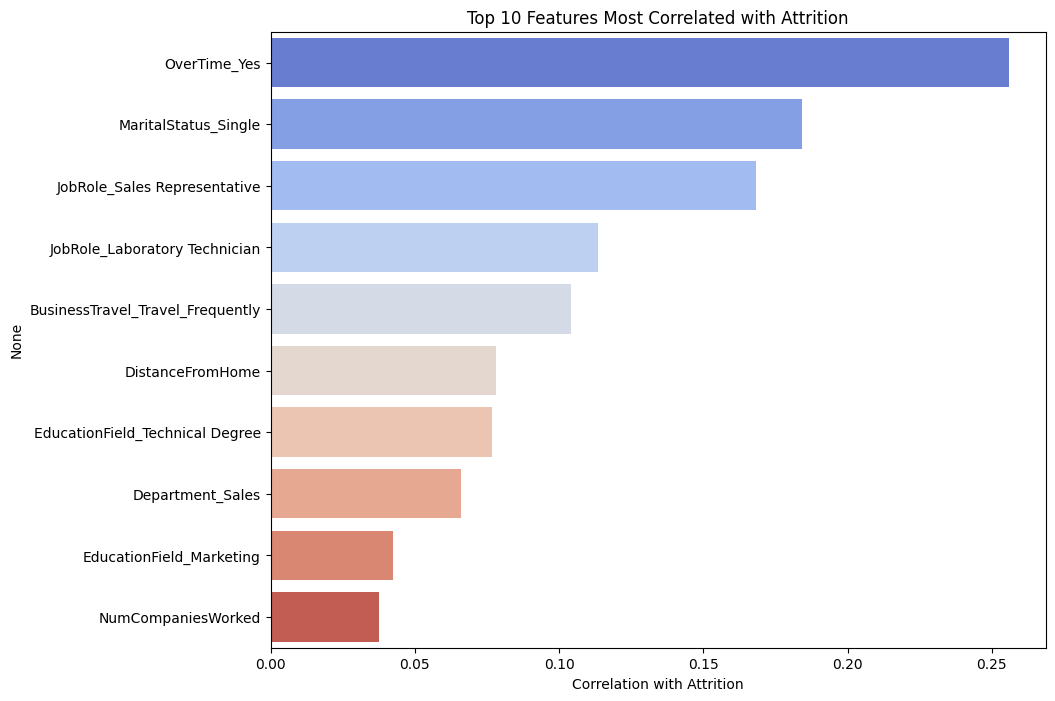

In [ ]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Ambil korelasi dengan kolom 'Attrition'
attrition_correlation = correlation_matrix["Attrition"].sort_values(ascending=False)

# Ambil 10 fitur dengan korelasi tertinggi terhadap 'Attrition'
top_10_factors = attrition_correlation.head(11)  # Include 'Attrition' itself as well
top_10_factors = top_10_factors.drop('Attrition')  # Remove 'Attrition' as we are interested in other factors

print("Top 10 factors most correlated with Attrition:")
print(top_10_factors)

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_factors.values, y=top_10_factors.index, hue=top_10_factors.index, dodge=False, palette="coolwarm", legend=False)
plt.title("Top 10 Features Most Correlated with Attrition")
plt.xlabel("Correlation with Attrition")
plt.show()

**Data Preparation/Preprocessing**

In [ ]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(['EmployeeId'], axis=1)

# Identifikasi fitur numerik dan kategorikal
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Attrition' in numerical_columns:
    numerical_columns.remove('Attrition')

# Standardisasi fitur numerik
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

#Mengubah nilai True dan False menjadi 1 dan 0
df_encoded = df_encoded.astype(int)

In [ ]:
# Memisahkan fitur dan target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Modeling**

In [ ]:
model = RandomForestClassifier(random_state=42)

# Latih model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluation**

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluasi hasil
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_proba))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[262   1]
 [ 49   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       263
           1       0.86      0.11      0.19        55

    accuracy                           0.84       318
   macro avg       0.85      0.55      0.55       318
weighted avg       0.84      0.84      0.79       318


AUC-ROC Score: 0.7609747666781889

Accuracy Score: 0.8427672955974843


In [ ]:
# Menyimpan model yang dilatih
joblib.dump(model, 'attrition_model.pkl')

['attrition_model.pkl']